In [1]:
import os, numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ExifTags

In [2]:
def stack_from_images(images, thresh=1):
    
    lights = []                                    ## brighter part of image, to stack with max
    faints = []                                    ## darker part of image, to stack with min or median

    for image in images:
        image = np.array(image)                    ## THE NUMBERS!

        if type(thresh)==int or type(thresh)==float:
            cut = thresh
        elif type(thresh)==str:
            cut = float(thresh) * image.mean()     ## thresh * (average over the whole image)

        print("threshold of image:", cut)  
        lights.append(image*(image > cut))      ## masking the brighter part
        faints.append(image*(image < cut))      ## masking the darker part

    light = np.array(lights).max(axis=0)           ## stacking with max
    faint = np.array(faints).min(axis=0)          ## stacking with min or median
    final = light + faint
    
    return Image.fromarray(np.uint8(final.clip(0,255)))



def stack_from_files(path, file_list, thresh=1):
    
    lights = []                                    ## brighter part of image, to stack with max
    faints = []                                    ## darker part of image, to stack with min or median

    for file in file_list:
        reader = Image.open(path + file)
        image = np.array(reader)                   ## THE NUMBERS!
        if type(thresh)==int or type(thresh)==float:
            cut = thresh
        elif type(thresh)==str:
            cut = float(thresh) * image.mean()     ## thresh * (average over the whole image)

        print("threshold of image:", cut)  
        lights.append(image*(image > cut))      ## masking the brighter part
        faints.append(image*(image < cut))      ## masking the darker part

    light = np.array(lights).max(axis=0)           ## stacking with max
    faint = np.array(faints).min(axis=0)          ## stacking with min or median
    final = light + faint
    
    return Image.fromarray(np.uint8(final.clip(0,255)))


## Read images

In [3]:
img1 = Image.open('example1/1.jpg')
img2 = Image.open('example1/2.jpg')

In [4]:
exif1 = { ExifTags.TAGS[k]: v for k, v in img1._getexif().items() if k in ExifTags.TAGS }
exif2 = { ExifTags.TAGS[k]: v for k, v in img2._getexif().items() if k in ExifTags.TAGS }

# print(exif1.keys())
print(exif1['DateTimeOriginal'])
print(exif2['DateTimeOriginal'])

2024:04:08 10:58:18
2024:04:08 10:58:29


## Look at histogram of one image; A threshold of 2 is probably OK

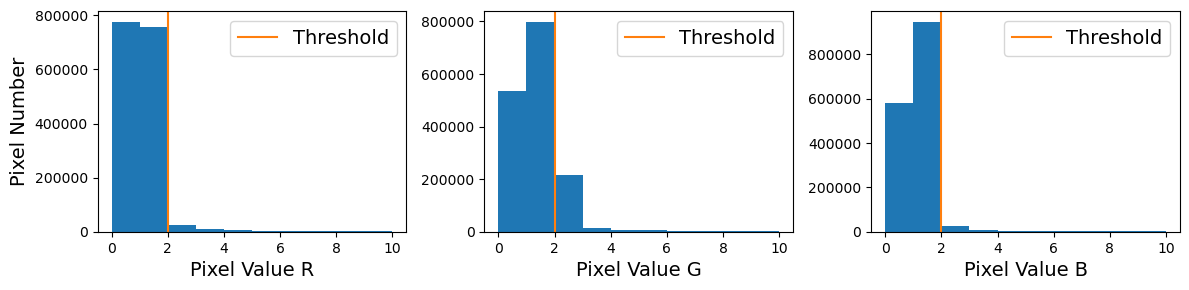

In [5]:
R, G, B = np.array(img1)[:,:,0], np.array(img1)[:,:,1], np.array(img1)[:,:,2]

fig, axes = plt.subplots(1,3, figsize=(12,3))

for ax, img in zip(axes, [R, G, B]):

    ax.hist(img.flatten(), bins=np.linspace(0, 10, 11));
    ax.axvline(x=2, label='Threshold', c='C1')
    
    ax.legend(fontsize=14)
    
for ax, c in zip(axes, ['R', 'G', 'B']):
        ax.set_xlabel(f'Pixel Value {c}', fontsize=14)

axes[0].set_ylabel('Pixel Number', fontsize=14)

plt.tight_layout()

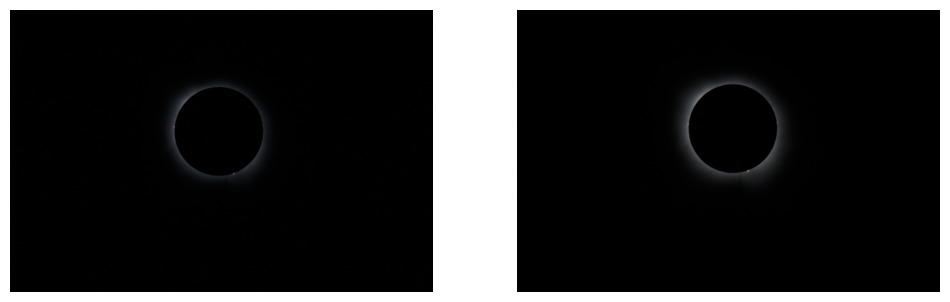

In [6]:
fig, axes = plt.subplots(1,2, figsize=(12,16))

ax1, ax2 = axes

ax1.imshow(img1)
ax2.imshow(img2)

ax1.axis('off')
ax2.axis('off');

## Stack image

threshold of image: 2
threshold of image: 2


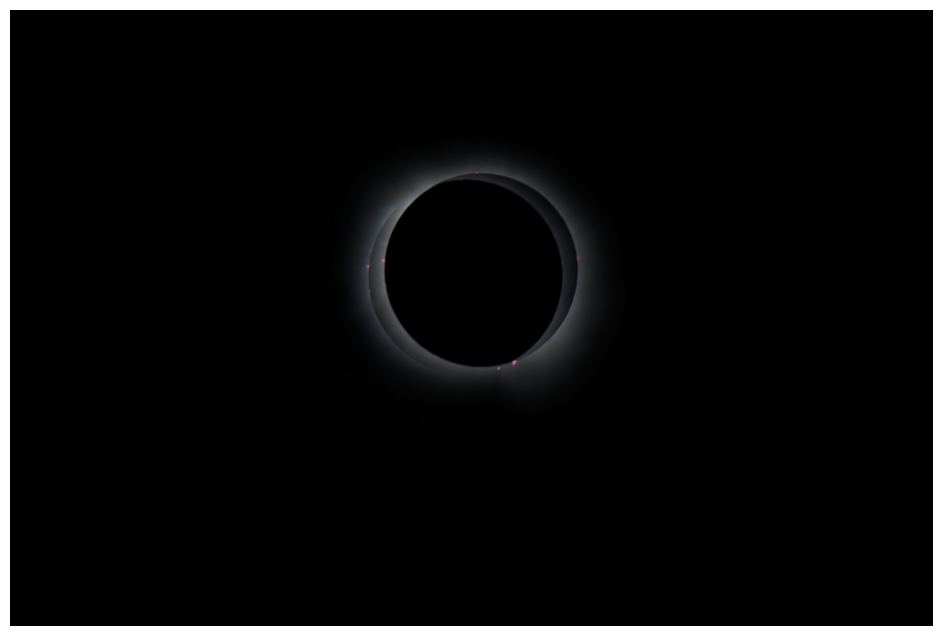

In [7]:
## thresh=1 for a cut on pixel value of 1;
## thresh='1' for a cut on pixel value of 1 times the mean image value

img_stack2 = stack_from_images([img1, img2], thresh=2)

fig, ax = plt.subplots(1,1, figsize=(12,8))

ax.imshow(img_stack2)
ax.axis('off');

## save image

In [8]:
img_stack2.save('out2.png', 'PNG')

## Alternatively, stack all images in folder

In [9]:
path = 'example1/'
file_list = os.listdir(path)

print(file_list)

['1.jpg', '2.jpg', '3.jpg']


threshold of image: 2
threshold of image: 2
threshold of image: 2


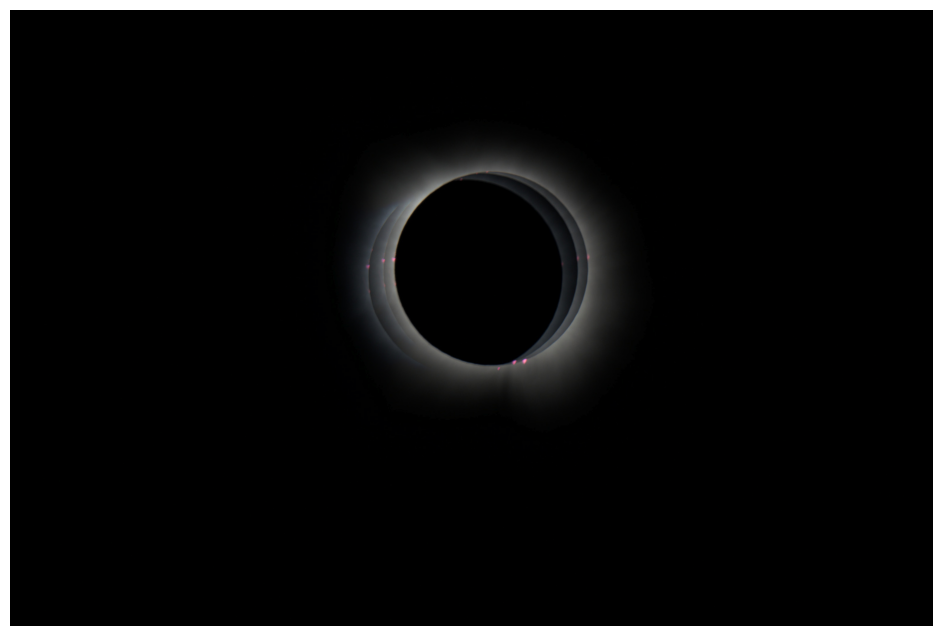

In [10]:
img_stack3 = stack_from_files(path, file_list, thresh=2)

fig, ax = plt.subplots(1,1, figsize=(12,8))

ax.imshow(img_stack3)
ax.axis('off');

In [11]:
img_stack3.save('out3.png', 'PNG')

## This function is kinda fun on daily images too

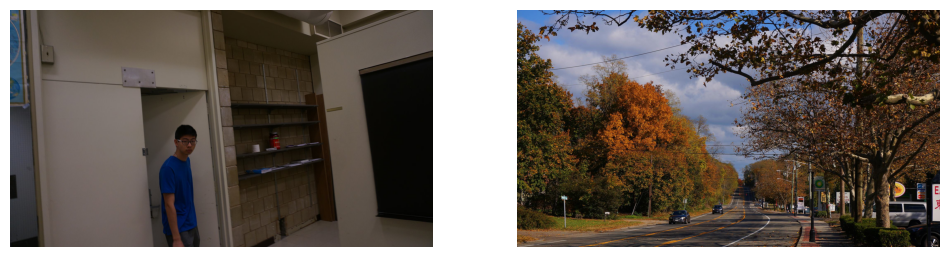

In [12]:
img1 = Image.open('example2/1a.jpg')
img2 = Image.open('example2/1b.jpg')

fig, axes = plt.subplots(1,2, figsize=(12,16))

ax1, ax2 = axes

ax1.imshow(img1)
ax2.imshow(img2)

ax1.axis('off')
ax2.axis('off');

threshold of image: 196.53839037024457
threshold of image: 213.69992909307064


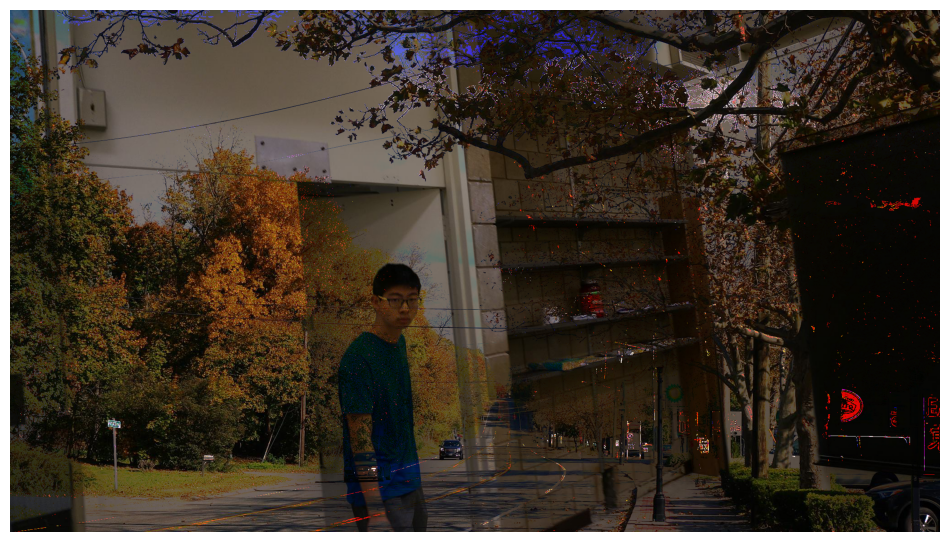

In [13]:
## thresh=1 for a cut on pixel value of 1;
## thresh='1' for a cut on pixel value of 1 times the mean image value

img_stack2 = stack_from_images([img1, img2], thresh='3')

fig, ax = plt.subplots(1,1, figsize=(12,8))

ax.imshow(img_stack2)
ax.axis('off');

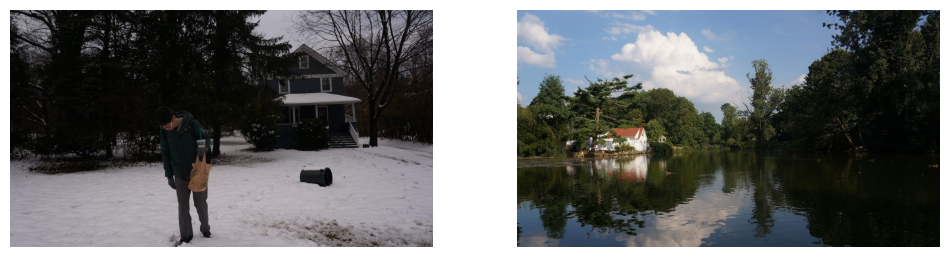

In [14]:
img1 = Image.open('example2/2a.jpg')
img2 = Image.open('example2/2b.jpg')

fig, axes = plt.subplots(1,2, figsize=(12,16))

ax1, ax2 = axes

ax1.imshow(img1)
ax2.imshow(img2)

ax1.axis('off')
ax2.axis('off');

threshold of image: 304.5903917572464
threshold of image: 299.9476941802536


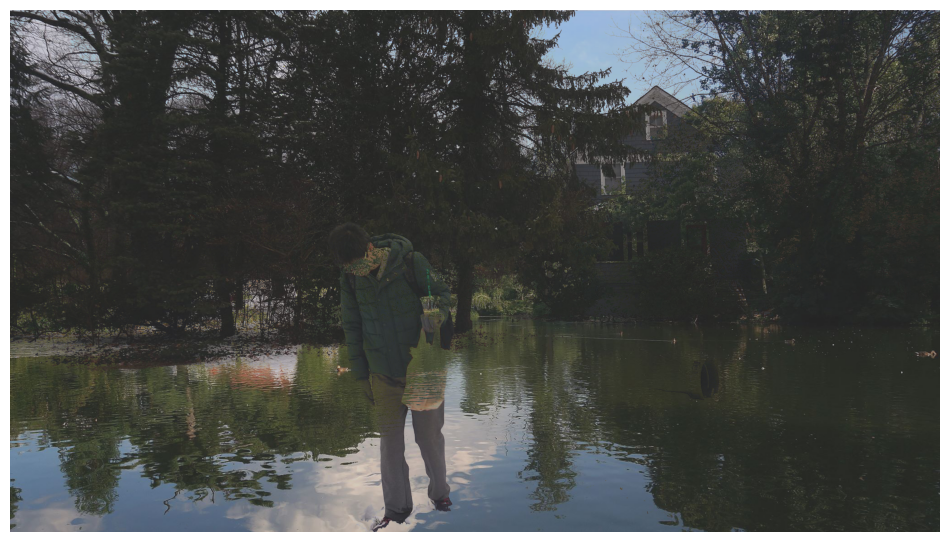

In [15]:
img_stack2 = stack_from_images([img1, img2], thresh='4')

fig, ax = plt.subplots(1,1, figsize=(12,8))

ax.imshow(np.array(img_stack2)+35)
ax.axis('off');

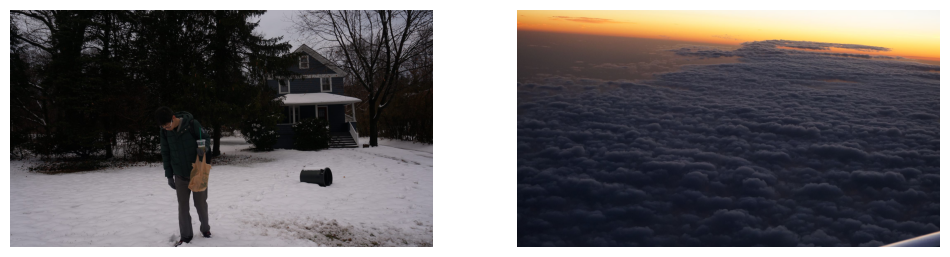

In [16]:
img1 = Image.open('example2/2a.jpg')
img2 = Image.open('example2/2c.jpg')

fig, axes = plt.subplots(1,2, figsize=(12,16))

ax1, ax2 = axes

ax1.imshow(img1)
ax2.imshow(img2)

ax1.axis('off')
ax2.axis('off');

threshold of image: 380.737989696558
threshold of image: 351.99470391757245


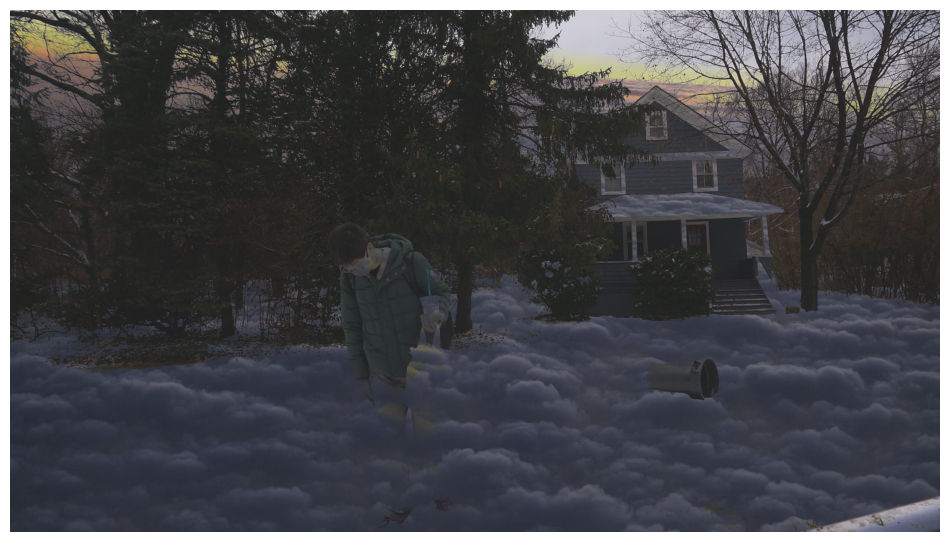

In [17]:
img_stack2 = stack_from_images([img1, img2], thresh='5')

fig, ax = plt.subplots(1,1, figsize=(12,8))

ax.imshow(np.array(img_stack2)+30)
ax.axis('off');

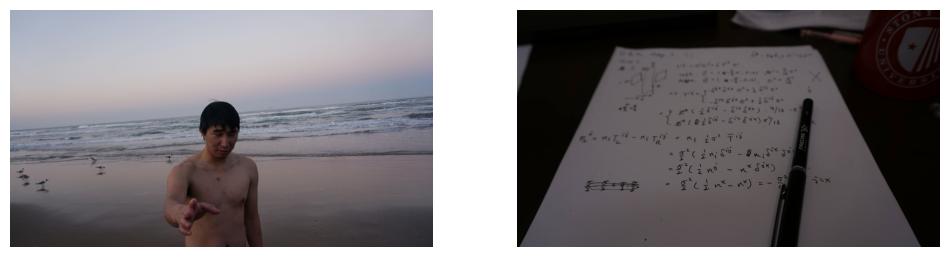

In [18]:
img1 = Image.open('example2/3a.jpg')
img2 = Image.open('example2/3b.jpg')

fig, axes = plt.subplots(1,2, figsize=(12,16))

ax1, ax2 = axes

ax1.imshow(img1)
ax2.imshow(img2)

ax1.axis('off')
ax2.axis('off');

threshold of image: 268.32116451539855
threshold of image: 114.07719769021739


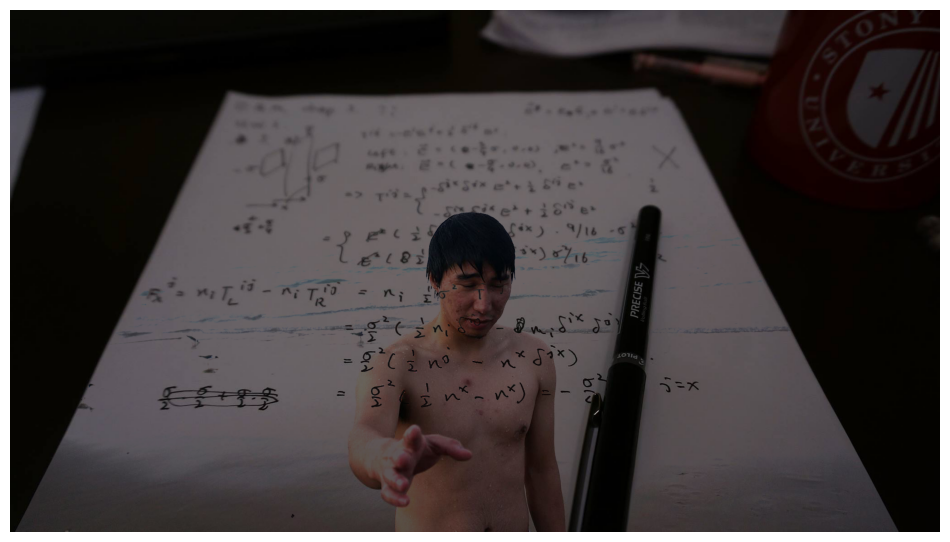

In [19]:
img_stack2 = stack_from_images([img1, img2], thresh='2')

fig, ax = plt.subplots(1,1, figsize=(12,8))

ax.imshow(np.array(img_stack2))
ax.axis('off');